In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
#Load your csv file
iris = pd.read_csv('iris.csv')
iris.head

<bound method NDFrame.head of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa

In [3]:
#Dropping columns that are not needed
X = iris.drop(['Id','Species'], axis = 1)
X.head

<bound method NDFrame.head of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]>

In [4]:
#Target data
y = iris['Species']

#Replacing categorical data with numbers
y = y.replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2])

#Split your Dataset into Train, test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes

Text(89.18, 0.5, 'Predicted')

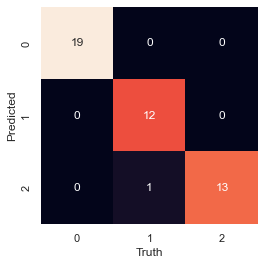

In [5]:
# Instantiate the Naive Bayes Classifier
gass = GaussianNB()

# Train the model 
gass.fit(X_train, y_train)

# Predict Output 
gass_pred = gass.predict(X_test)

# Plot Confusion Matrix
gass_mat = confusion_matrix(gass_pred, y_test)
gass_names = np.unique(gass_pred)
sns.heatmap(gass_mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=gass_names, yticklabels=gass_names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

# K Nearest Neighbors

Text(89.18, 0.5, 'Predicted')

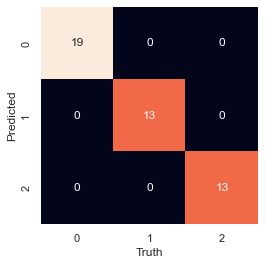

In [6]:
# Instantiate the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Predict Output 
knn_pred = knn.predict(X_test)

# Plot Confusion Matrix
knn_mat = confusion_matrix(knn_pred, y_test)
knn_names = np.unique(knn_pred)
sns.heatmap(knn_mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=knn_names, yticklabels=knn_names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

# Random Forest

Text(89.18, 0.5, 'Predicted')

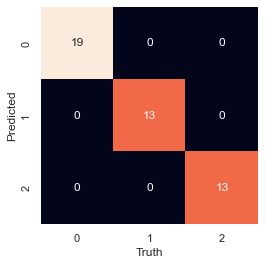

In [7]:
# Instantiate the Random Forest Classifier
rfc = RandomForestClassifier(max_depth=2, random_state=0)

# Train the model
rfc.fit(X_train, y_train)

# Predict Output 
rfc_pred = rfc.predict(X_test)

# Plot Confusion Matrix
rfc_mat = confusion_matrix(rfc_pred, y_test)
rfc_names = np.unique(rfc_pred)
sns.heatmap(rfc_mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=rfc_names, yticklabels=rfc_names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

# Decision Tree

Text(89.18, 0.5, 'Predicted')

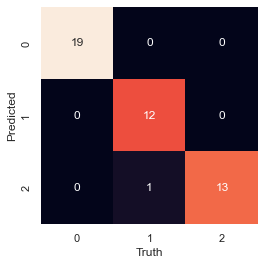

In [12]:
# Instantiate the Decision Tree Classifier
dtc = DecisionTreeClassifier(max_depth=2, random_state=0)

# Train the model
dtc.fit(X_train, y_train)

# Predict Output 
dtc_pred = dtc.predict(X_test)

# Plot Confusion Matrix
dtc_mat = confusion_matrix(dtc_pred, y_test)
dtc_names = np.unique(dtc_pred)
sns.heatmap(dtc_mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=dtc_names, yticklabels=dtc_names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

# SVM

Text(89.18, 0.5, 'Predicted')

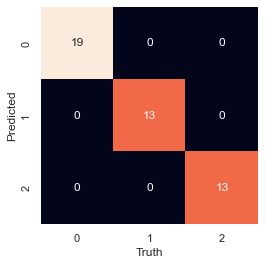

In [9]:
# Instantiate the Support Vector Classifier
svc = SVC(gamma='auto')

# Train the model
svc.fit(X_train, y_train)

# Predict Output 
svc_pred = svc.predict(X_test)

# Plot Confusion Matrix
svc_mat = confusion_matrix(svc_pred, y_test)
svc_names = np.unique(svc_pred)
sns.heatmap(svc_mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=svc_names, yticklabels=svc_names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

# K Means

### From the code below you can see that K means does not work well with classification but it used to find a grouping of data which maximizes between-clusters distances

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

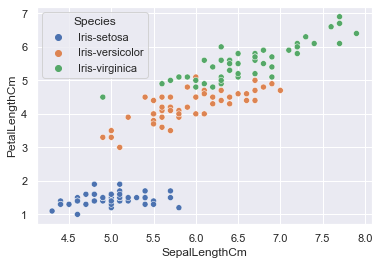

In [10]:
# Instantiate the K Means Classifier
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

#Scatterplot for the Iris Dataset with 'Petal Length' against 'Sepal Length'
sns.scatterplot(data=iris, x="SepalLengthCm", y="PetalLengthCm", hue="Species")

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

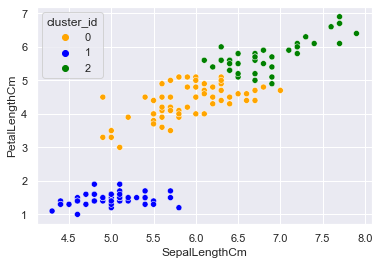

In [11]:
#The Scatter Plot for the clusters made by K Means with 'Petal Length' against 'Sepal Length'
X['cluster_id'] = kmeans.labels_
dic = {0:"Orange", 1:"Blue", 2:"Green"}
sns.scatterplot(x="SepalLengthCm", y="PetalLengthCm", data=X, hue="cluster_id", palette = dic)